# CWUR Regression Analysis

### 1-2. Importing libraries and data

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [126]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 6\World University Rankings Analysis'

In [127]:
# Import dataset

df_cwur = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cwur_top200.csv'))

### 3. Data Cleaning

##### Removing irrelevant columns

In [128]:
# Drop index column

df_cwur = df_cwur.drop(columns = ['Unnamed: 0'])

##### Missing values

In [129]:
# Check for missing values

df_cwur.isnull().sum()

world_rank_CWUR                0
university_name                0
country                        0
national_rank                  0
quality_of_education_rank      0
alumni_employment_rank         0
quality_of_faculty_rank        0
publications_rank              0
influence_rank                 0
citations_rank                 0
broad_impact_rank            200
patents_rank                   0
overall_score_CWUR             0
year                           0
dtype: int64

Despite there being 200 missing values in the broad_impact_rank column, I cannot remove or replace them as that could lead to potential bias in the data. I will refrain from using this column in regression analysis.

##### Duplicates check

In [130]:
# Create a dataframe with just duplicated values

dups = df_cwur.duplicated()

In [131]:
# Check size of duplicated dataframe

dups.shape 

(600,)

No duplicates

##### Extreme values checks

In [132]:
df_cwur.describe()

,world_rank_CWUR,national_rank,quality_of_education_rank,alumni_employment_rank,quality_of_faculty_rank,publications_rank,influence_rank,citations_rank,broad_impact_rank,patents_rank,overall_score_CWUR,year
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,400.000000,600.000000,600.000000,600.000000
mean,83.833333,19.970000,133.046667,161.585000,100.326667,101.565000,103.231667,100.995000,121.282500,154.556667,55.255600,2013.833333
std,55.322447,23.206105,115.659687,159.273778,72.780847,100.335127,102.066697,97.084296,110.033409,181.345951,11.937349,1.068078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,38.000000,3.000000,45.000000,51.750000,38.750000,38.000000,38.750000,38.000000,50.750000,41.000000,48.540000,2013.000000
50%,75.500000,7.000000,101.000000,101.000000,85.500000,80.000000,81.000000,78.000000,99.500000,100.000000,50.765000,2014.000000
75%,125.250000,34.250000,189.500000,205.500000,173.500000,127.000000,131.250000,125.000000,155.000000,181.500000,56.122500,2015.000000
max,200.000000,86.000000,367.000000,567.000000,218.000000,980.000000,834.000000,812.000000,917.000000,871.000000,100.000000,2015.000000


While there are some extreme values for certain factors like publication ranking and broad impact ranking, removing these outliers would delete some already limited data values since the dataframe isn't very big. Normally, I would use the entire original dataset for the regression analysis down below but I am more interested in the "world_rank_CWUR" values and in particular the top 200 universities. 

### 4. Data Exploration of Variables

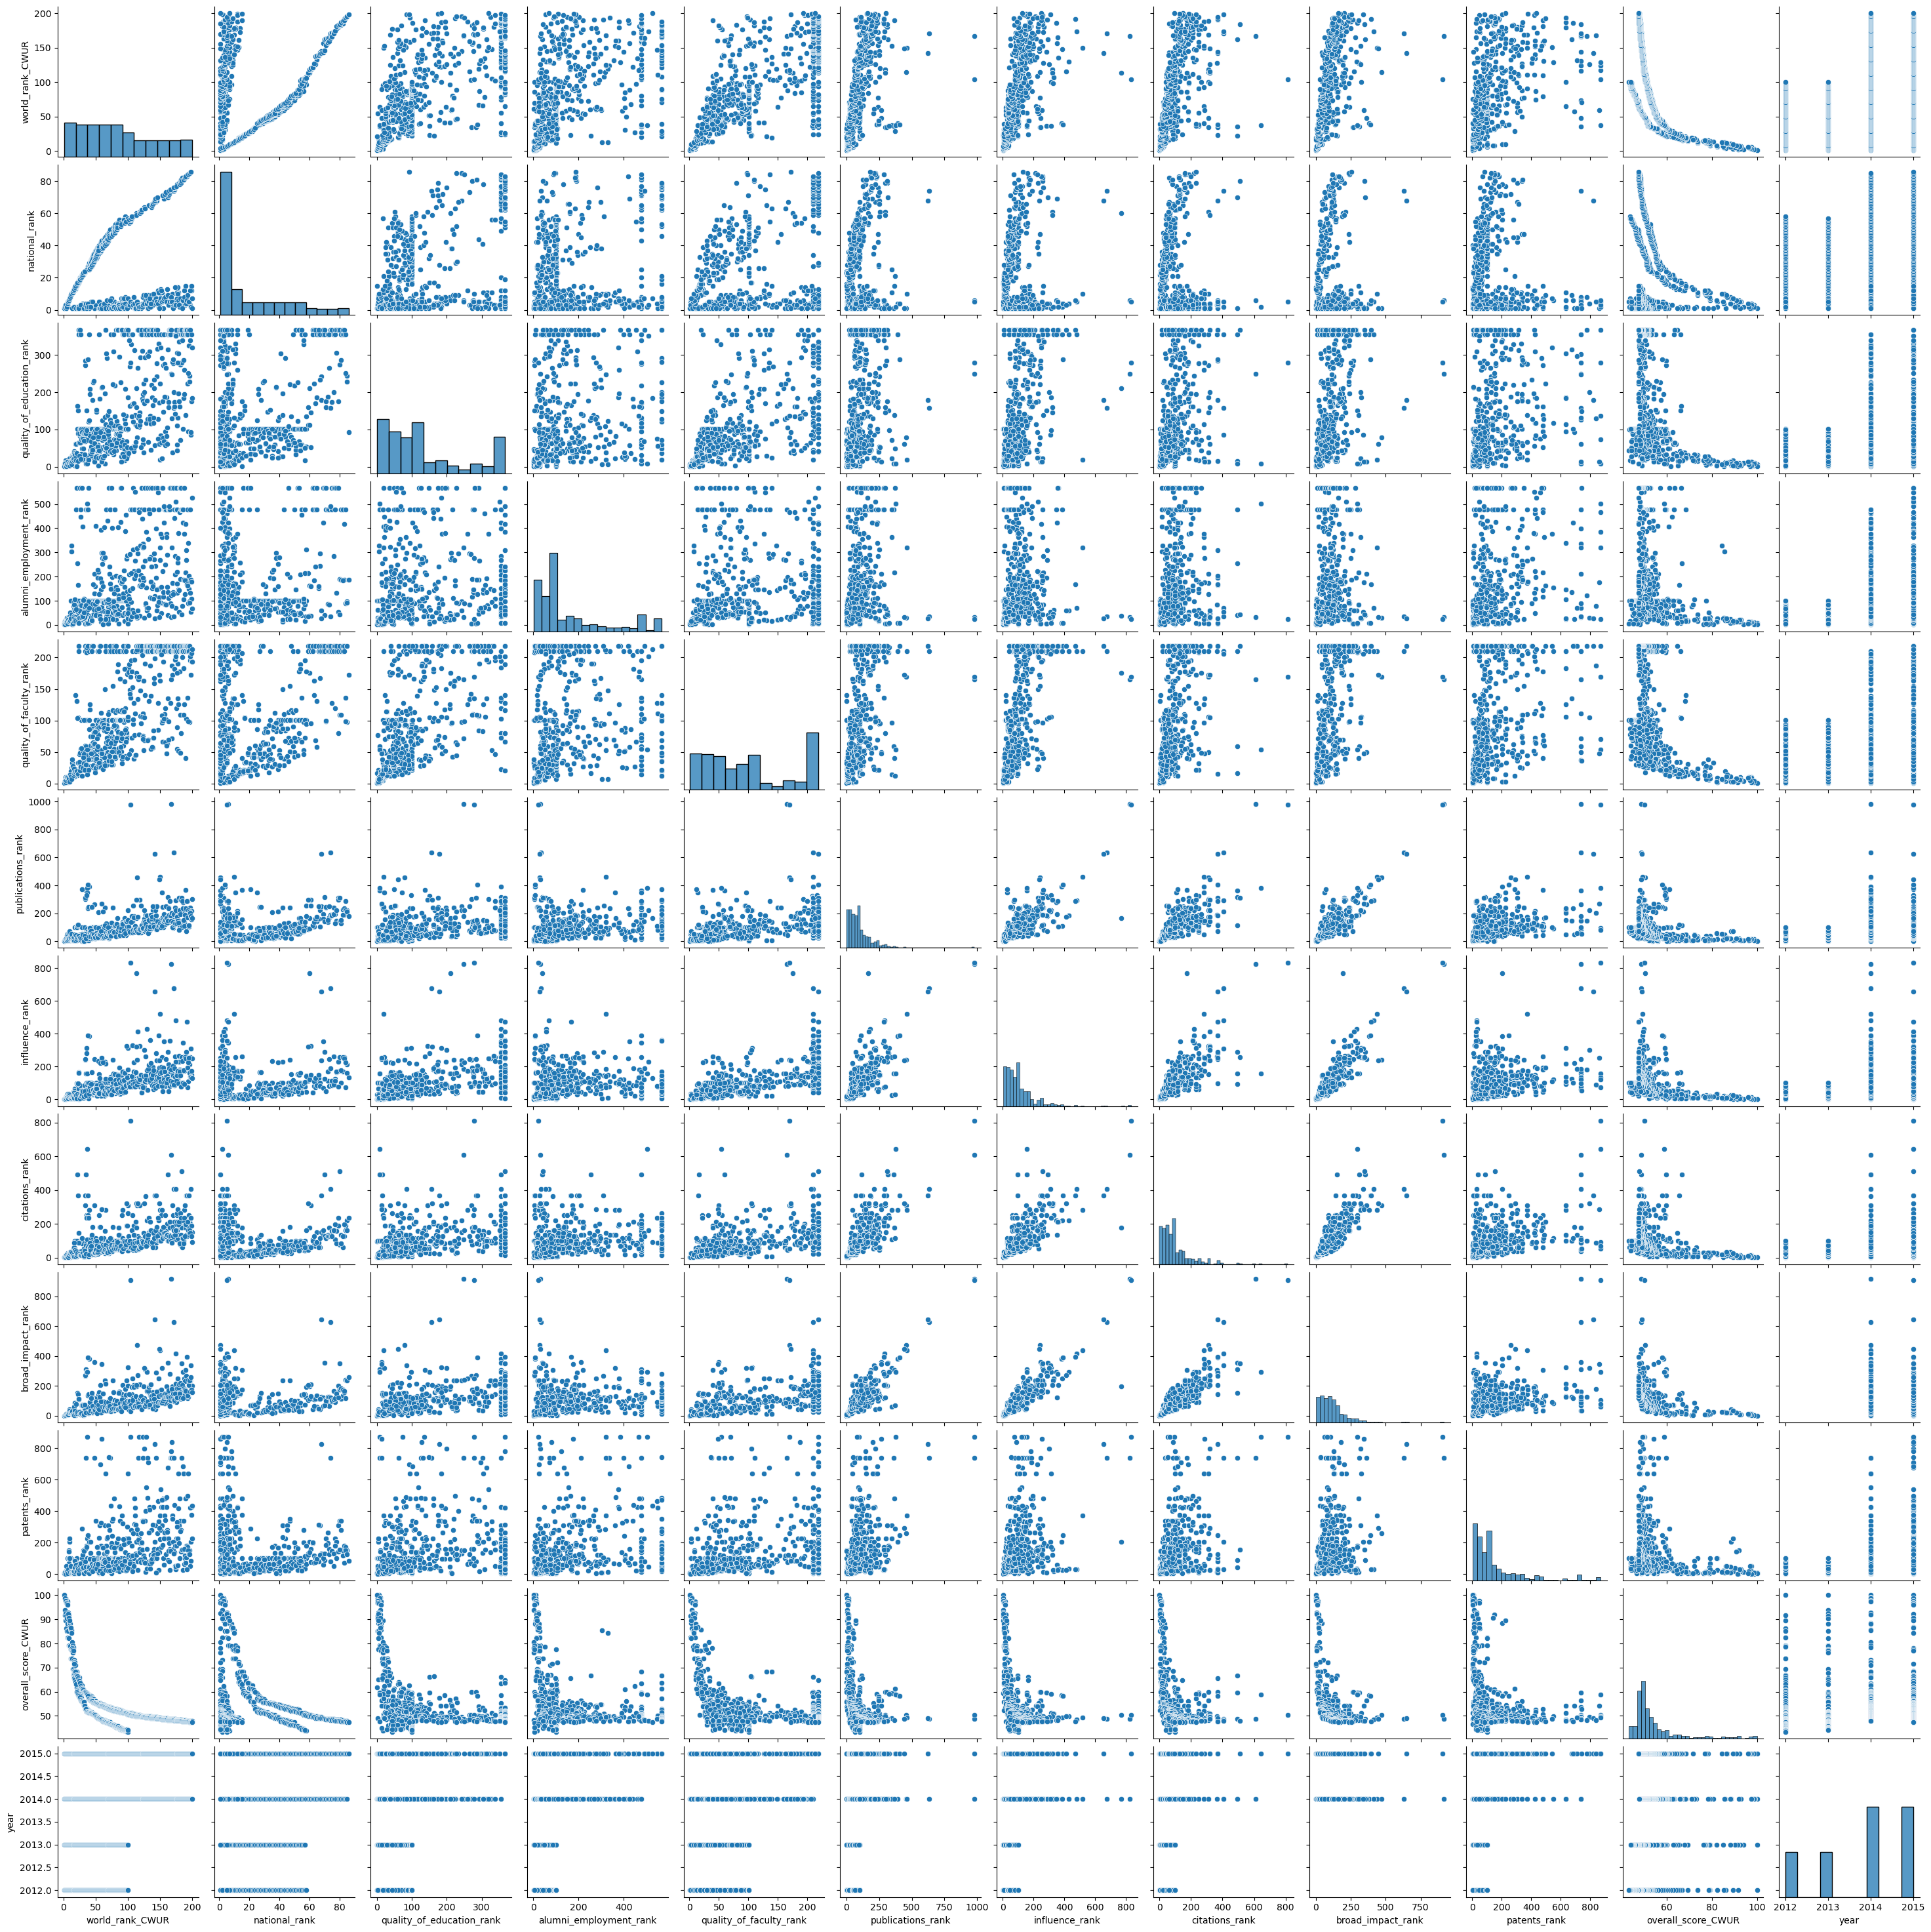

In [133]:
# Create a pair plot to see relationships between variables

g = sns.pairplot(df_cwur)

#### Investigate variables further 

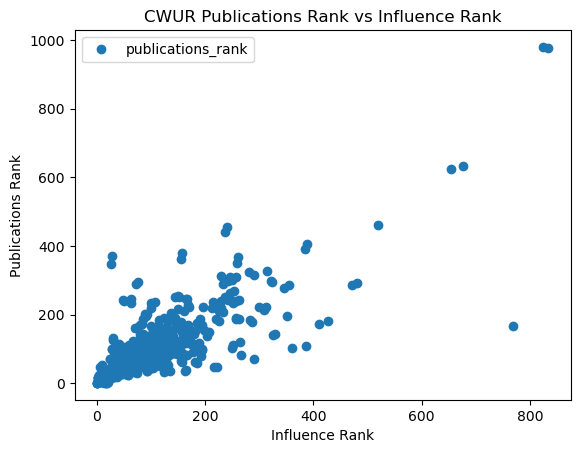

<Figure size 640x480 with 0 Axes>

In [134]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_cwur.plot(x = 'influence_rank', y='publications_rank',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('CWUR Publications Rank vs Influence Rank')  
plt.xlabel('Influence Rank')  
plt.ylabel('Publications Rank')  
plt.show()
plt.tight_layout()

### 5. Hypothesis

#### Universities with a worse influence ranking (high number) will likely have a worse publication ranking (high number) as well .

### 6. Reshaping variables

In [135]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_cwur['influence_rank'].values.reshape(-1,1)
y = df_cwur['publications_rank'].values.reshape(-1,1)

In [136]:
X

array([[  1],
       [  4],
       [  2],
       [ 16],
       [ 22],
       [ 33],
       [ 13],
       [  6],
       [ 12],
       [  5],
       [ 20],
       [ 21],
       [ 10],
       [ 19],
       [  9],
       [ 51],
       [ 36],
       [ 67],
       [ 11],
       [  8],
       [ 28],
       [ 91],
       [ 24],
       [  3],
       [ 30],
       [ 71],
       [ 15],
       [ 26],
       [ 43],
       [ 47],
       [ 23],
       [ 44],
       [ 25],
       [ 17],
       [ 14],
       [ 29],
       [ 18],
       [ 52],
       [  7],
       [ 72],
       [ 39],
       [101],
       [101],
       [ 48],
       [ 40],
       [ 54],
       [ 57],
       [ 96],
       [ 31],
       [ 42],
       [101],
       [ 50],
       [ 68],
       [101],
       [ 74],
       [101],
       [101],
       [101],
       [ 35],
       [ 41],
       [101],
       [ 34],
       [ 53],
       [ 60],
       [ 93],
       [ 73],
       [ 38],
       [ 55],
       [101],
       [ 49],
       [ 32],
      

In [137]:
y

array([[  1],
       [ 12],
       [  4],
       [ 16],
       [ 37],
       [ 53],
       [ 15],
       [ 14],
       [ 13],
       [  6],
       [ 34],
       [ 22],
       [  9],
       [  8],
       [ 11],
       [ 40],
       [ 25],
       [101],
       [  3],
       [ 10],
       [101],
       [101],
       [ 42],
       [ 19],
       [ 17],
       [ 35],
       [ 20],
       [ 26],
       [101],
       [ 41],
       [ 27],
       [ 39],
       [ 24],
       [  2],
       [  7],
       [ 31],
       [ 32],
       [ 74],
       [  5],
       [ 68],
       [ 33],
       [ 61],
       [101],
       [ 46],
       [ 23],
       [ 71],
       [ 59],
       [ 73],
       [ 18],
       [ 45],
       [101],
       [ 30],
       [ 82],
       [101],
       [ 29],
       [ 72],
       [101],
       [101],
       [ 50],
       [ 64],
       [101],
       [ 48],
       [ 36],
       [ 38],
       [101],
       [101],
       [ 28],
       [ 47],
       [101],
       [ 84],
       [ 21],
      

### 7. Split data into training and test set

In [138]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Running Linear Regression on data

In [139]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [140]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [141]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### 9. Plotting the test data and the regression line

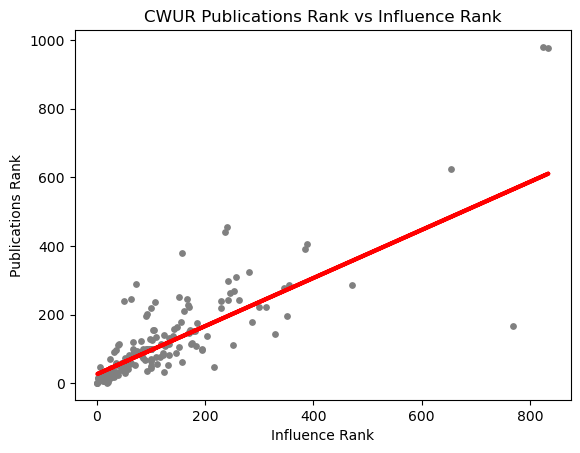

In [142]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('CWUR Publications Rank vs Influence Rank')
plot_test.xlabel('Influence Rank')
plot_test.ylabel('Publications Rank')
plot_test.show()

### 10. Interpretation of the graph

The regression lines seems to be an okay fit. There are some outliers that are very off compared to the projected values from the lines though. But for universities with better influence and publication rankings (lower values), the regression line seems alright.

### 11. Checking the model's performance statistics

In [143]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [144]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.70067346]]
Mean squared error:  5996.00985965432
R2 score:  0.6730095414008204


Based on the R squared value, the value of 0.673 indicates that it is a decent fit but still not very good. In addition, the error based on the Mean squared error is roughly 77, which is a significant difference. Hence, the model is not very accurate and linear regression may not be the most optimal way to look for a relationship between these two variables.

### 12. Comparing predicted y values vs actual y values

In [145]:
y_predicted

array([[ 44.51804847],
       [ 46.62006886],
       [ 43.11670155],
       [132.80290469],
       [ 35.40929346],
       [169.23792471],
       [ 59.93286464],
       [103.37461928],
       [ 48.72208924],
       [ 40.3140077 ],
       [119.49010891],
       [ 27.00121192],
       [ 59.93286464],
       [130.00021084],
       [ 48.02141578],
       [ 86.55845619],
       [ 73.24566042],
       [ 92.86451735],
       [ 48.72208924],
       [146.11570047],
       [124.39482314],
       [108.98000698],
       [148.21772085],
       [ 97.06855812],
       [137.00694546],
       [ 97.06855812],
       [244.91065862],
       [ 58.53151771],
       [ 56.42949733],
       [202.87025089],
       [162.23119009],
       [153.82310855],
       [604.35614464],
       [ 32.60659962],
       [ 44.51804847],
       [145.41502701],
       [ 72.54498695],
       [103.37461928],
       [ 27.00121192],
       [ 29.10323231],
       [112.48337429],
       [565.11843077],
       [ 54.32747694],
       [ 97

In [146]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,19,44.518048
1,19,46.620069
2,21,43.116702
3,107,132.802905
4,14,35.409293
5,139,169.237925
6,40,59.932865
7,135,103.374619
8,32,48.722089
9,36,40.314008


##### Thoughts:

The model worked decently well to predict publication vs influence rankings but there could have been potential data bias. For one, while the criteria that the CWUR use to evaluate universities are supposed to be independent of each other, they most likely aren't. Certain factors are likely tied together such as quality of education and quality of faculty or publications and influence 

Another possible issue with this regression analysis is that it was only run on a subset of the original data. This dataframe only contained 600 rows for analysis, which may have made the model less accurate. Pairplots and regression analysis could have been done on the original dataset with 2200 rows, but the large amount of datapoints would have affected scatterplots and made analysis even more difficult. In addition, analysis with other rankings could only be done with the top 200 and 100 universities so it makes sense to analyze the top 200 universities here as well.

Regression analysis may have led to more interesting insights when predicting a university's projected world ranking vs time. However, this dataset in particular only contains data from 2012 to 2015, which means that a university only has at most 4 datapoints for world rankings. Forecasting with only 4 datapoints could lead to wide margins of error, especially if a university had an outlier for world ranking in a particular year. Another possible application could be projecting an individual country's average world ranking, but this would have similar problems. 